In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
import warnings
warnings.filterwarnings('ignore')

# loading datasets

In [3]:
df=pd.read_csv('Titanic-Dataset.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

preprocessing

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.corr

<bound method DataFrame.corr of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# investigate columns that consist null values
df_isna = df.isna().sum()
df_isna[df_isna > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
# Investigate unique values in each column
df_str = df.copy()
for i in df_str.columns:
    df_str[i] = df_str[i].apply(lambda x: str(x))
df_str.replace('nan',np.nan,inplace=True)

df_str.describe(include='object').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
PassengerId,891,891,1,1
Name,891,891,"Braund, Mr. Owen Harris",1
Ticket,891,681,347082,7
Fare,891,248,8.05,43
Cabin,204,147,B96 B98,4
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644


# visualization 

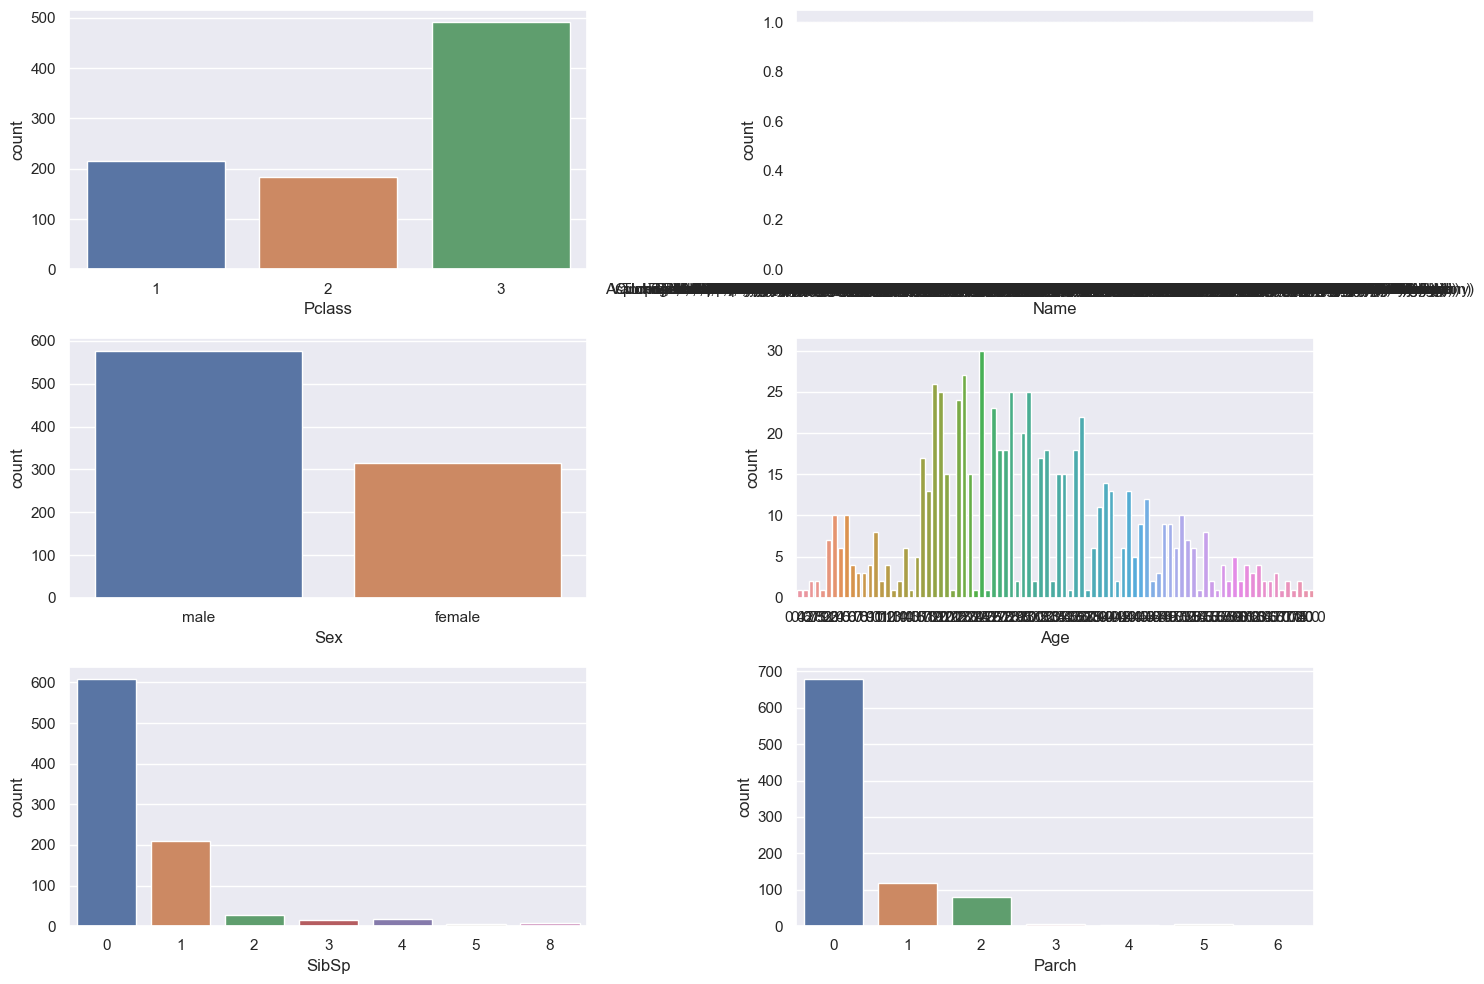

In [11]:
# visualise categorical columns
fig,axes=plt.subplots(3,2,figsize=(15,10))
sns.countplot(data=df,x=df.columns[2],ax=axes[0,0])
sns.countplot(data=df,x=df.columns[3],ax=axes[0,1])
sns.countplot(data=df,x=df.columns[4],ax=axes[1,0])
sns.countplot(data=df,x=df.columns[5],ax=axes[1,1])
sns.countplot(data=df,x=df.columns[6],ax=axes[2,0])
sns.countplot(data=df,x=df.columns[7],ax=axes[2,1])
plt.tight_layout()

<Axes: xlabel='Fare', ylabel='Age'>

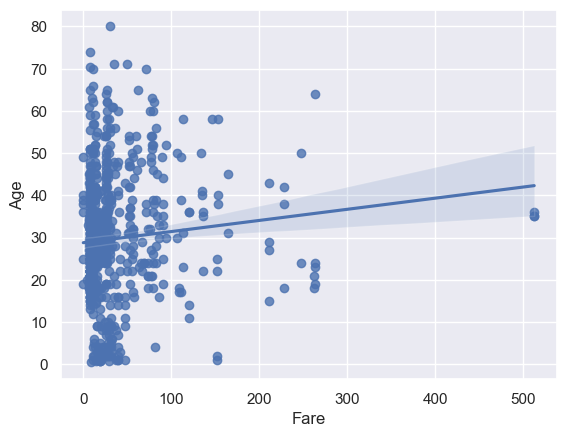

In [12]:
sns.regplot(data=df,x='Fare',y='Age')

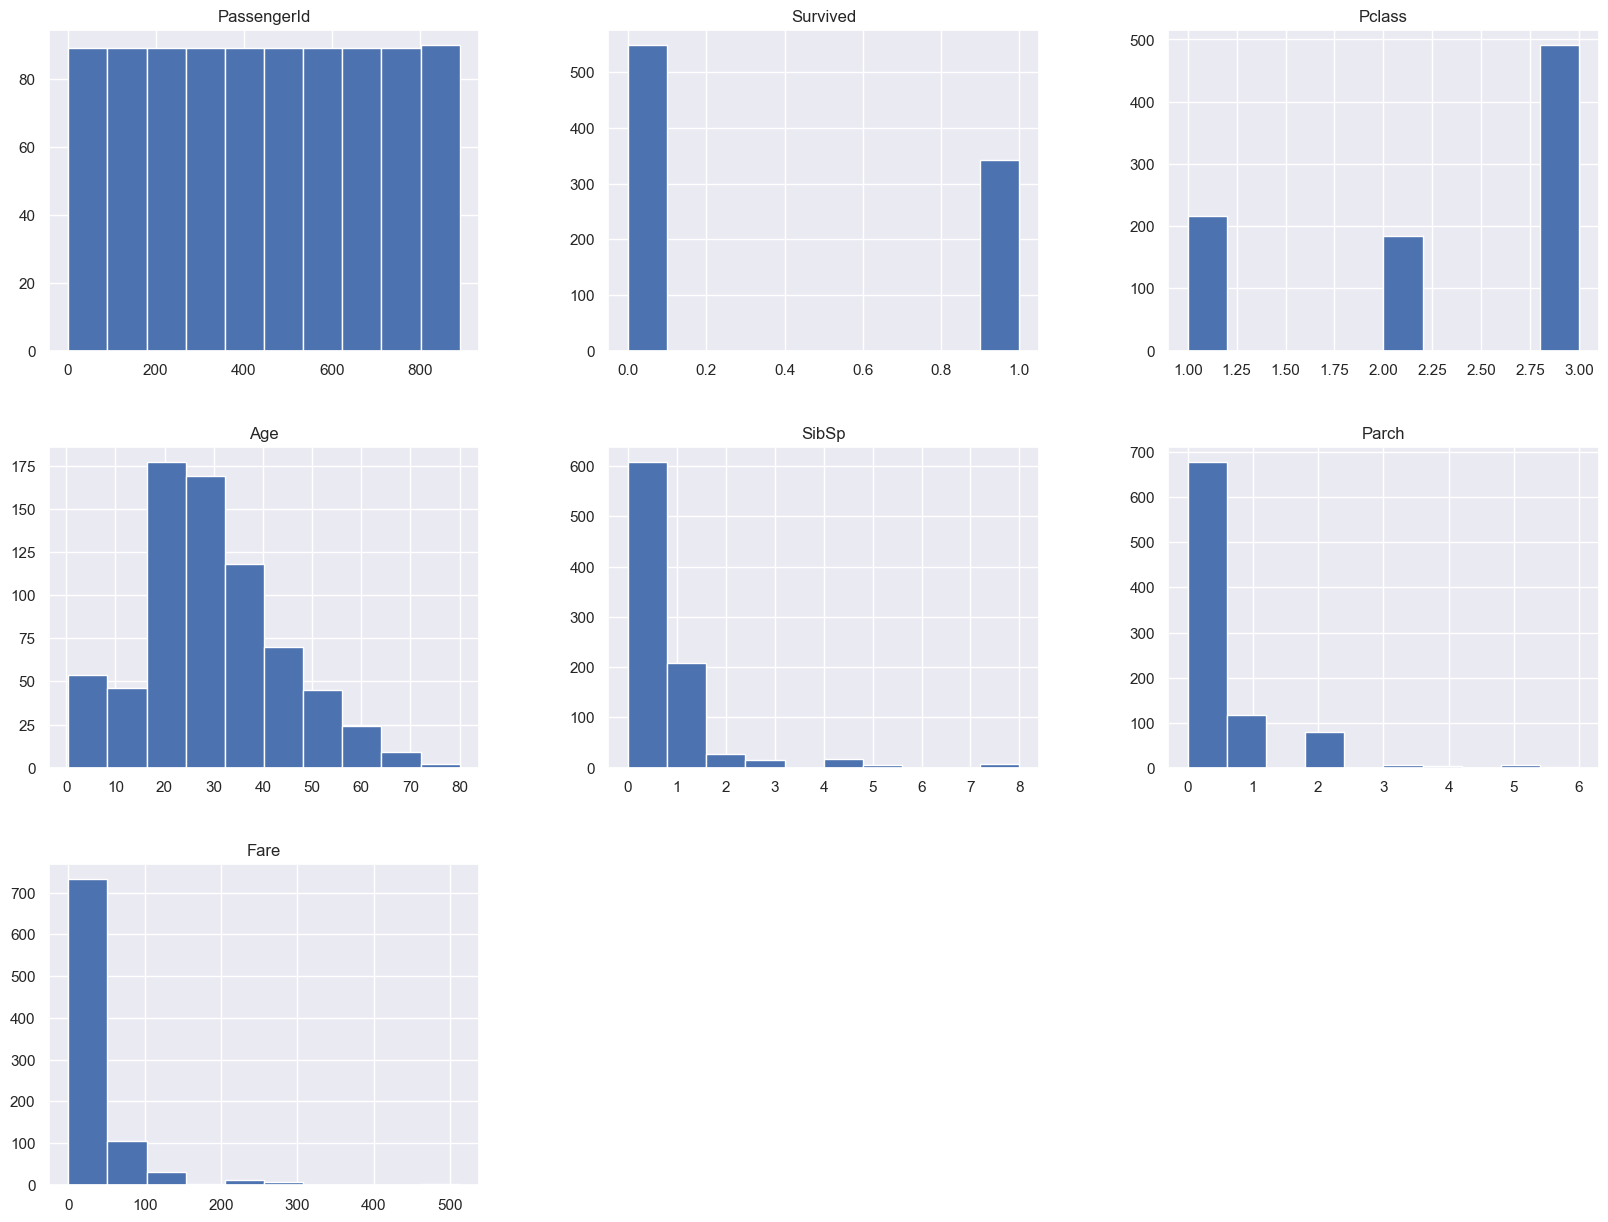

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

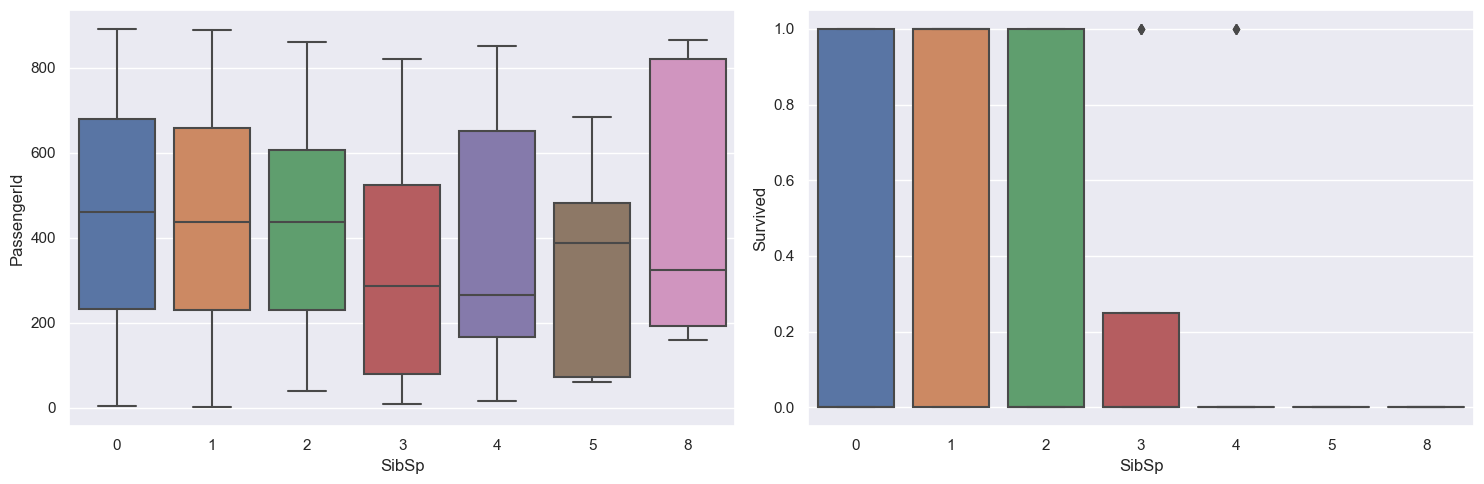

In [14]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df,x=df.columns[6],y=df.columns[0],ax=axes[0])
sns.boxplot(data=df,x=df.columns[6],y=df.columns[1],ax=axes[1])
plt.tight_layout()

In [15]:
df.head(20).style.background_gradient(cmap="Blues")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.458300,nan,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,nan,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,nan,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,nan,C


<Axes: >

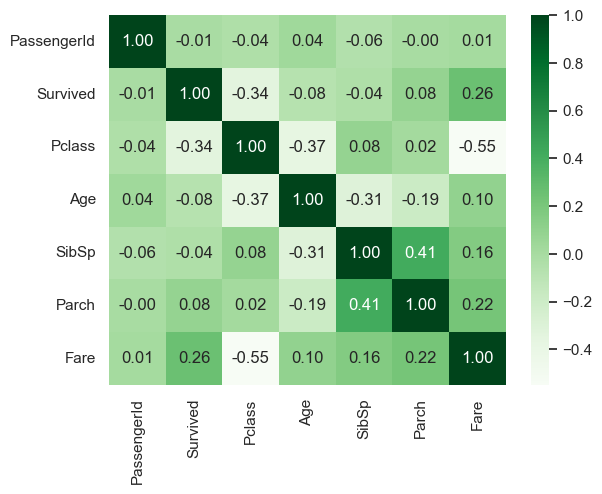

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f",cmap="Greens")

# train_test_split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_train, df_test = train_test_split(df,test_size= 0.25)

In [19]:

df_train.shape

(668, 12)

In [20]:
df_test.shape

(223, 12)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



df.dropna(inplace=True)  # Drop rows with missing values
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]  # Features
y = df['Survived']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6756756756756757


In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=10)
clf1.fit(X_train,y_train)
clf1.score(X_train,y_train)

0.7465753424657534

In [23]:
from sklearn.naive_bayes import GaussianNB
clfx=GaussianNB()
clfx.fit(X_train,y_train)
clfx.score(X_train,y_train)

0.7397260273972602